# Linear Regression by scratch approach, sklearn library and Artificial Neural Network using Tensorflow.

In this notebook, we implemented the linear regression model from scratch. To see if it is working as expected, we decided to use sklearn library for the same model. We compared the results of these two approaches with Artificial Neural Network.

As anticipated, ANN performed well.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
#Loading data
data = pd.read_csv("/home/aims/Documents/Kaggle Data/diabetes.csv")


In [23]:

#Input values of features
X = data.drop('BMI',1)
print('shape of X: ',X.shape)

#Output values of features
y = data['BMI'].values.reshape(-1,1)
print('shape of y: ',y.shape)

#splitting data into train and test set
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)


shape of X:  (768, 8)
shape of y:  (768, 1)


# Linear regression from scratch

In [24]:
#Define cost fuction
#X-input values matrix, y-output value vector, parameter vector

def cost_function(X,y,params):
    #number of samples
    no_samples = len(y)
    
    #Error- difference between predicted value of y and actual/observed value of value
    error = (X@params) - y
    
    #formula for obtaining the cost
    return (1/(2*no_samples))*np.sum(error**2)
    
    

In [25]:
#Define gradient descent
def gradient_descent(X, y, params, learning_rate, n_iters):
    no_samples = len(y)
    
    #Track cost in each iteration
    cost_track = np.zeros((n_iters,1))
    
    for i in range(n_iters):
        #updating parameters
        params = params - (learning_rate/no_samples)* X.T @ (X@params-y)
        cost_track[i] = cost_function(X,y,params)
    return (cost_track,params)

In [26]:
#Normalizing our data/ feature scaling 
mu = np.mean(x_train,0)
sigma = np.std(x_train,0)

x_train = (x_train-mu)/sigma

#Introducing bias in our input matrix
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))

#Initialising parameters to zeros
params = np.zeros((x_train.shape[1],1))

Initial cost is :  549.9019136807818
Optimal parameters are:  [[32.20667752]
 [-0.20253948]
 [ 0.88835153]
 [ 1.41410899]
 [ 2.71927362]
 [-0.34896191]
 [ 0.20942998]
 [-0.42277112]
 [ 1.82124106]]
Final cost is:  [22.57762383]


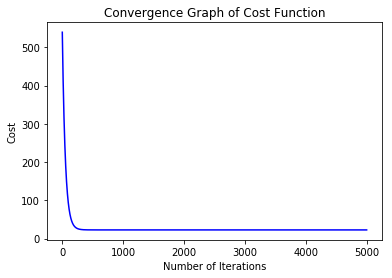

In [27]:
#Training our model
n_iters  = 5000

learning_rate = 0.01

initial_cost = cost_function(x_train,y_train,params)

print('Initial cost is : ', initial_cost)

(cost_track, optimal_parameters) = gradient_descent(x_train,y_train,params,learning_rate,n_iters)

print('Optimal parameters are: ', optimal_parameters)

print('Final cost is: ', cost_track[-1])

#Plotting a graph of convergence of cost fuction

plt.plot(range(len(cost_track)), cost_track, 'b')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [28]:
#Normalising our test set
x_test = (x_test-mu)/sigma

#Introducing bias to test set
x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))

#predicting the y output
y_pred = x_test@optimal_parameters


In [29]:
#Evaluating our model using RMSE
rms = np.sqrt(mean_squared_error(y_pred, y_test))
rms

6.861001413749793

# Linear regression using sklearn

In [19]:
#import Linear regression module
from sklearn.linear_model import LinearRegression

In [22]:
#Calling the linear regression function from sklearn
model = LinearRegression()

#training our model
model.fit(x_train,y_train)

print('The intercept of the model is: ', model.intercept_)

print('The coeffeicient of the model are: ',model.coef_)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [125]:
#predicting output value of y
y_pred = model.predict(x_test)


In [124]:
#Evaluating our model using RMSE
rms = np.sqrt(mean_squared_error(y_pred, y_test))
rms

6.861001413931367

# Linear regression using ANN by tensorflow

In [3]:
#Input values of features
X = data.drop('BMI',1)
print('shape of X: ',X.shape)

#Output values of features
y = data['BMI'].values.reshape(-1,1)
print('shape of y: ',y.shape)




shape of X:  (768, 8)
shape of y:  (768, 1)


In [4]:
#Performing feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)


/usr/lib/python3/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
#Checking the maximum values of the input features
print('Maximum value of each feature',scaler_x.data_max_)
#Checking the minimum values of the input features
print('Minimum value of each feature', scaler_x.data_min_)

#Checking the maximum values of the output
print('Maximum value of output',scaler_y.data_max_)
#Checking the minimum values of the output
print('Minimum value of output', scaler_y.data_min_)


In [16]:
#Checking to ensure that the values of the scaled features and output are between 0 and 1.
print(X_scaled)
print(y_scaled)

**Training the model**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=0)

In [9]:
#tensflow used to build ANN
#We can take keras as a function
import tensorflow.keras

#building model in a sequential form
from keras.models import Sequential

#for fully connceted ANN(dense)
from keras.layers import Dense

model = Sequential()
#Add first layer, 45=no of neurons, 5=inputs
model.add(Dense(40, input_dim=8, activation='relu'))
#adding hidden layer
model.add(Dense(40, activation='relu'))
#adding output layer, 1=output, act=linear becoz we predict continous values
model.add(Dense(1, activation='linear'))
#Generate table showing description of your ANN
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs=10, batch_size=50,  verbose=1, validation_split=0.2)




Train on 491 samples, validate on 123 samples
Epoch 1/10
491/491 [==============================] - 0s 214us/step - loss: 0.1813 - val_loss: 0.0639
Epoch 2/10
491/491 [==============================] - 0s 15us/step - loss: 0.0355 - val_loss: 0.0220
Epoch 3/10
491/491 [==============================] - 0s 26us/step - loss: 0.0228 - val_loss: 0.0253
Epoch 4/10
491/491 [==============================] - 0s 24us/step - loss: 0.0187 - val_loss: 0.0172
Epoch 5/10
491/491 [==============================] - 0s 19us/step - loss: 0.0152 - val_loss: 0.0161
Epoch 6/10
491/491 [==============================] - 0s 26us/step - loss: 0.0143 - val_loss: 0.0145
Epoch 7/10
491/491 [==============================] - 0s 20us/step - loss: 0.0130 - val_loss: 0.0139
Epoch 8/10
491/491 [==============================] - 0s 18us/step - loss: 0.0124 - val_loss: 0.0132
Epoch 9/10
491/491 [==============================] - 0s 37us/step - loss: 0.0117 - val_loss: 0.0126
Epoch 10/10
491/491 [======================

**Evaluating the model**

dict_keys(['val_loss', 'loss'])


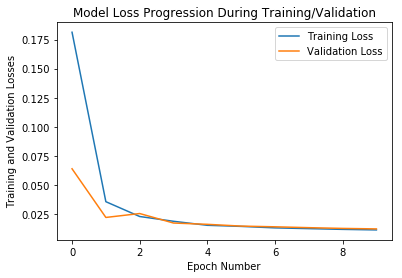

In [12]:
print(epochs_hist.history.keys())
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])




**Prediction**

In [15]:

y_predict_sample = model.predict(X_test)

print('Expected measure of BMI=', y_predict_sample)
y_predict_sample_original = scaler_y.inverse_transform(y_predict_sample)
print('Expected measure of BMI=', y_predict_sample_original)


In [14]:
#Evaluating our model using RMSE
rms = np.sqrt(mean_squared_error(y_predict_sample, y_test))
rms

0.10627072087221504